### Preprocessing 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr
import os

In [78]:

def get_labels(image_directory):
    images, labels, cropped_plates, filenames = [], [], [], []
    reader = easyocr.Reader(['en'])

    #counter = 1

    for filename in os.listdir(image_directory):
        #print(counter)
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            #print(filename)
            img_path = os.path.join(image_directory, filename)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            bfilter = cv2.bilateralFilter(gray, 11, 11, 17)
            edged = cv2.Canny(bfilter, 30, 200)

            keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            contours = imutils.grab_contours(keypoints)
            contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

            location = None
            for contour in contours:
            # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
                approx = cv2.approxPolyDP(contour, 10, True)
                if len(approx) == 4:
                    location = approx
                    break

            try:
                mask = np.zeros(gray.shape, np.uint8)
                new_image = cv2.drawContours(mask, [location], 0, 255, -1)
                new_image = cv2.bitwise_and(img, img, mask = mask)
            except:
                continue

            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            # Adding Buffer
            cropped_image = gray[x1:x2+3, y1:y2+3]
            #plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

            result = reader.readtext(cropped_image)
            if len(result) != 0:
                images.append(img)
                cropped_plates.append(cropped_image)
                labels.append(result[0][1])
                filenames.append(filename)
        #counter += 1

    return images, labels, cropped_plates, filenames

In [79]:
image_directory = 'archive/images'

images, labels, cropped_plates, filenames = get_labels(image_directory)

In [81]:
image_directory2 = 'archive/processed_images'

images2, labels2, cropped_plates2, filenames2 = get_labels(image_directory2)

In [83]:
len(labels)

150

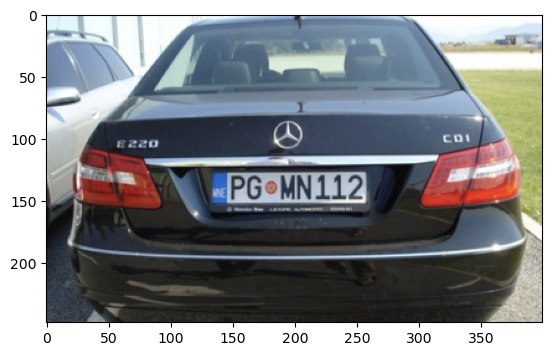

In [21]:
img = cv2.imread('archive/images/Cars1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

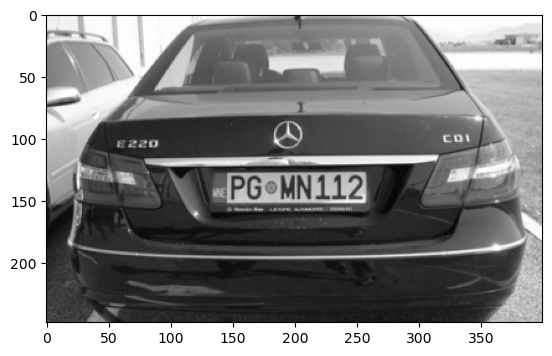

In [23]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

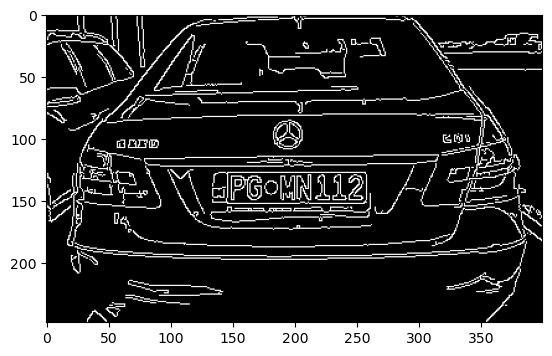

In [24]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [25]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

location = None
for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

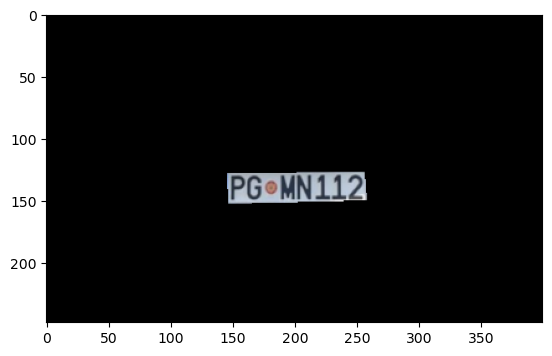

In [26]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

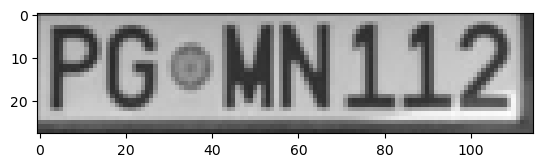

In [27]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
# Adding Buffer
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [28]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

[([[0, 0], [115, 0], [115, 28], [0, 28]], 'PGeNN112', 0.28113843397263677)]


In [55]:
print(result[0][1])

PGeNN112
